In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Business Understanding

AirBnB is a company that allows owners of properties to rent them out to other individuals. It has expanded tremendously since launching 11 years ago, while at the same time triggering some controversy. Critics of AirBnB have alleged that excessive rentals of properties have helped tourists at the expense of residents who face difficulties in finding accomodation.

The business purpose of analyzing AirBnB data would be to find out whether certain patterns are present in typical rentals. One could investigate what tends to drive prices up, and what tends to drive them down. Other possible business factgors could involve the length of rentals, the reviews typically given to properties, or the amenities they offer. 

In [3]:
from sklearn.model_selection import train_test_split

# Data Understanding

In the data understanding part of my project, I will proceed to familiarize myself with the data, come up with ways to use it, and identify issues that I might need to work on. 

In [4]:
calendar = pd.read_csv('calendar.csv')

In [5]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


The dataset above contains just four columns, listing_id, date, available and price. Many missing values are visible in the "price" column. The date column is a string, even though it should be datetime. The available column is also listed as a string, even though it actually should be a boolean. The price column is a string as well, even though it should be an int.

In [7]:
calendar['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

As suspected, the available column consists just of true/false values. Also, it is clear that the number of "True" values is identical to the number of non-missing values for price - 934542. This suggests that for every property available on AirBnB in Seattle, the dataset will tell me the price only if it is available. Coming to think of it, it makes sense - if a property is unavailable, then listing a price makes no sense.

In [8]:
calendar['listing_id'].value_counts()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
479653      365
3251069     365
6400379     365
8597800     365
4841586     365
7710713     365
3155785     365
6949900     365
3646393     365
3870253     365
1252147     365
9280767     365
808134      365
1737244     365
7262358     365
9910189     365
5078244     365
7178490     365
7182584     365
8463726     365
8989807     365
9497431     365
3904056     365
2277640     365
6837338     365
           ... 
8518308     365
8579782     365
8409750     365
1317919     365
7506165     365
9939025     365
948077      365
7096107     365
9117633     365
2406966     365
8157486     365
3657819     365
8568567     365
4130112     365
6363779     365
10309898    365
5433597     365
2809796     365
8474294     365
24212       365
279063      365
3975434     365
6823837     365
7627794     365
8566475     365
9999759     365
9048029     365
8441477     365
7984550     365
9484823     365
Name: listing_id, Length

Coming to think of it, I would change the listing_id column from int to string. While technically the values are numbers, it appears very unlikely that I will be able to perform any mathematical operations on them. It is notable that pretty much every value in listing_id appears 365 times - the number of days in a year. 

The value_counts also tells me that there are 3818 properties in the dataset, with the availability and, if applicable, price listed for each of the 365 days.

In [9]:
listings = pd.read_csv('listings.csv')

In [10]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

At first glance, it is visible that there are 3818 rows in the listings dataset - identical to the number of distinct listing_ids in the previous one. As in the previous dataset, it seems clear that the id column should have a string datatype, and not integer. I will not be conducting mathematical operations on the id numbers.

The listing_url column essentially duplicates the id, and therefore seems useless. I would recommend deleting it.

In [12]:
listings['scrape_id'].value_counts()

20160104002432    3818
Name: scrape_id, dtype: int64

The scrape_id column contains the same value 3818 times. I will proceed to delete it

In [13]:
listings['last_scraped'].value_counts()

2016-01-04    3818
Name: last_scraped, dtype: int64

The last_scraped column similarly contains the same exact value, '2016-01-04', 3818 times. I will delete it.

The name column is short-enough to be readable. I will keep it.

The space and description columns seem to long to read them. I will remove them

In [14]:
listings['experiences_offered'].value_counts()

none    3818
Name: experiences_offered, dtype: int64

Strangely enough, the experiences_offered column contains exclusively the "none" value.

In [15]:
listings['neighborhood_overview'].head()

0                                                  NaN
1    Queen Anne is a wonderful, truly functional vi...
2    Upper Queen Anne is a charming neighborhood fu...
3                                                  NaN
4    We are in the beautiful neighborhood of Queen ...
Name: neighborhood_overview, dtype: object

This column contains a description of the neighborhood. Might be useful.

In [16]:
listings['notes'].head()

0                                                  NaN
1    What's up with the free pillows?  Our home was...
2    Our house is located just 5 short blocks to To...
3                                                  NaN
4                                            Belltown 
Name: notes, dtype: object

Certain notes regarding each of the properties. Debateable whether this column will help me at all. Note the large number of missing values.

In [17]:
listings['transit'].head()

0                                                  NaN
1    Convenient bus stops are just down the block, ...
2    A bus stop is just 2 blocks away.   Easy bus a...
3                                                  NaN
4    The nearest public transit bus (D Line) is 2 b...
Name: transit, dtype: object

This column mentions the various forms of public transit available in the vicinity of the property. It seems useful only when looking at individual cases. Apart from that, I can hardly imagine using this column to go through thousands of properties. also notable is the large number of missing values.

In [18]:
listings['thumbnail_url'].head()

0                                                  NaN
1    https://a0.muscache.com/ac/pictures/14409893/f...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: thumbnail_url, dtype: object

These URLs will not help me with my questions.

In [19]:
listings['medium_url'].head()

0                                                  NaN
1    https://a0.muscache.com/im/pictures/14409893/f...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: medium_url, dtype: object

In [20]:
listings['picture_url'].head()

0    https://a1.muscache.com/ac/pictures/67560560/c...
1    https://a0.muscache.com/ac/pictures/14409893/f...
2    https://a2.muscache.com/ac/pictures/b4324e0f-a...
3    https://a0.muscache.com/ac/pictures/94146944/6...
4    https://a1.muscache.com/ac/pictures/6120468/b0...
Name: picture_url, dtype: object

The picture_url column consists of URLs that are dead links.

In [21]:
listings['xl_picture_url']

0                                                     NaN
1       https://a0.muscache.com/ac/pictures/14409893/f...
2                                                     NaN
3                                                     NaN
4                                                     NaN
5       https://a2.muscache.com/ac/pictures/84791950/f...
6       https://a2.muscache.com/ac/pictures/26505642/2...
7       https://a2.muscache.com/ac/pictures/83538305/d...
8       https://a0.muscache.com/ac/pictures/85453284/d...
9       https://a2.muscache.com/ac/pictures/33003258/f...
10      https://a0.muscache.com/ac/pictures/2788698/87...
11      https://a0.muscache.com/ac/pictures/59566840/b...
12      https://a2.muscache.com/ac/pictures/48864586/9...
13      https://a2.muscache.com/ac/pictures/69b4dfed-9...
14      https://a2.muscache.com/ac/pictures/91278310/1...
15                                                    NaN
16      https://a0.muscache.com/ac/pictures/57011178/e...
17      https:

Once again, dead-link URLs.

In [22]:
listings['host_id'].head()

0      956883
1     5177328
2    16708587
3     9851441
4     1452570
Name: host_id, dtype: int64

In [23]:
listings['host_id'].value_counts()

8534462     46
4962900     39
1243056     37
430709      36
3074414     34
74305       33
26967583    21
7354306     18
42537846    16
1623580     12
658155      12
2911360     11
862329      11
754810      10
31148752    10
50893       10
14980831     9
5325329      9
4411144      9
1787819      8
10558142     7
5820099      7
1121532      7
6372203      6
22764472     6
5177328      6
50550045     6
12796487     6
2409388      5
32807985     5
            ..
45917623     1
41319913     1
17928378     1
21149225     1
42273230     1
23372237     1
45437387     1
9565783      1
34605512     1
295367       1
2161126      1
9060841      1
27761130     1
15512043     1
205325       1
36706828     1
7182858      1
27129222     1
13042181     1
1845764      1
13959773     1
15436286     1
2294267      1
33931765     1
36882932     1
38090170     1
11839982     1
668141       1
1691632      1
10420224     1
Name: host_id, Length: 2751, dtype: int64

Potentially useful column with the IDs of the hosts. Note that it should be changed from int to string. I will not be conducting mathematical operations on these numbers.

In [24]:
listings['host_url'].head()

0      https://www.airbnb.com/users/show/956883
1     https://www.airbnb.com/users/show/5177328
2    https://www.airbnb.com/users/show/16708587
3     https://www.airbnb.com/users/show/9851441
4     https://www.airbnb.com/users/show/1452570
Name: host_url, dtype: object

Seems like a duplication of the host_id column. I would recommend removal.

In [25]:
listings['host_name'].head()

0     Maija
1    Andrea
2      Jill
3     Emily
4     Emily
Name: host_name, dtype: object

This column seems more straightforward than the host_id one, but a potential issue arises - names can repeat themselves. Indeed, the two Emilys in rows 3 and 4 are different people. Therefore, I would delete this column and rely on the host_ids instead.

In [26]:
listings['host_since'].head()

0    2011-08-11
1    2013-02-21
2    2014-06-12
3    2013-11-06
4    2011-11-29
Name: host_since, dtype: object

Useful column, but should be of datetype format and not string.

In [27]:
listings['host_location'].head()

0    Seattle, Washington, United States
1    Seattle, Washington, United States
2    Seattle, Washington, United States
3    Seattle, Washington, United States
4    Seattle, Washington, United States
Name: host_location, dtype: object

In [28]:
listings['host_location'].value_counts()

Seattle, Washington, United States                                    3259
US                                                                     246
Spokane, Washington, United States                                      41
Kent, Washington, United States                                         34
Los Angeles, California, United States                                  13
Bellevue, Washington, United States                                     12
San Francisco, California, United States                                11
Mercer Island, Washington, United States                                10
Kirkland, Washington, United States                                      8
New York, New York, United States                                        6
Seattle                                                                  5
Shoreline, Washington, United States                                     5
Vashon, Washington, United States                                        5
Sammamish, Washington, Un

This is an interesting column which tells us where the host lives. Most of them, of course, live in Seattle itself. Some, however, live a considerable distance away from the city. Do absentee hosts have different characteristics compared to those who live closer to their property?

In [29]:
listings['host_about'].head()

0    I am an artist, interior designer, and run a s...
1    Living east coast/left coast/overseas.  Time i...
2    i love living in Seattle.  i grew up in the mi...
3                                                  NaN
4    Hi, I live in Seattle, Washington but I'm orig...
Name: host_about, dtype: object

Seems like a column where every host gives an explanation about himself. It is not easy to extract information from this column, and on top of that there are hundreds of missing values. I would recommend removal.

In [30]:
listings['host_response_time'].head()

0    within a few hours
1        within an hour
2    within a few hours
3                   NaN
4        within an hour
Name: host_response_time, dtype: object

In [31]:
listings['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

This is a valuable column. The only issue is the large number of missing values.

In [32]:
listings['host_response_rate'].head()

0     96%
1     98%
2     67%
3     NaN
4    100%
Name: host_response_rate, dtype: object

In [33]:
listings['host_response_rate'].value_counts()

100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
98%       28
96%       28
70%       25
97%       21
83%       20
60%       20
92%       18
93%       18
33%       14
40%       12
63%       11
78%        8
95%        8
71%        8
91%        5
43%        4
25%        3
87%        3
76%        3
64%        3
82%        2
17%        2
57%        2
58%        2
30%        1
68%        1
65%        1
56%        1
38%        1
81%        1
31%        1
53%        1
69%        1
55%        1
Name: host_response_rate, dtype: int64

Seems like a helpful column. The datatype should maybe be changed from string to int, and the large number of missing values are an issue too.

In [34]:
listings['host_acceptance_rate'].head()

0    100%
1    100%
2    100%
3     NaN
4     NaN
Name: host_acceptance_rate, dtype: object

In [35]:
listings['host_acceptance_rate'].value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

Seems like a column that overwhelmingly contains the same value. I would recommend removal.

In [36]:
listings['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

This is a good column that tells us whether a host qualifies as a "superhost". In airBnB speak, this is a host who is experienced and well-rated.

In [37]:
listings['host_thumbnail_url'].head()

0    https://a0.muscache.com/ac/users/956883/profil...
1    https://a0.muscache.com/ac/users/5177328/profi...
2    https://a1.muscache.com/ac/users/16708587/prof...
3    https://a2.muscache.com/ac/users/9851441/profi...
4    https://a0.muscache.com/ac/users/1452570/profi...
Name: host_thumbnail_url, dtype: object

At least this column only has two missing values, but I struggle to see how these pictures will help me with my questions.

In [38]:
listings['host_picture_url'].head()

0    https://a0.muscache.com/ac/users/956883/profil...
1    https://a0.muscache.com/ac/users/5177328/profi...
2    https://a1.muscache.com/ac/users/16708587/prof...
3    https://a2.muscache.com/ac/users/9851441/profi...
4    https://a0.muscache.com/ac/users/1452570/profi...
Name: host_picture_url, dtype: object

In [39]:
listings['host_neighbourhood'].value_counts()

Capitol Hill                 405
Belltown                     254
Ballard                      210
Minor                        191
Queen Anne                   189
Fremont                      147
Wallingford                  134
North Beacon Hill            101
Ravenna                      100
Central Business District     93
Stevens                       87
First Hill                    85
University District           80
Greenwood                     80
Lower Queen Anne              75
Columbia City                 61
Green Lake                    55
Magnolia                      53
North Admiral                 53
Phinney Ridge                 52
Atlantic                      49
Leschi                        46
Mount Baker                   44
Eastlake                      42
Madrona                       40
Maple Leaf                    40
The Junction                  39
Roosevelt                     32
Pike Place Market             31
Genesee                       30
          

Seems like a useful column that states what neighborhood the host lives in. The 300+ missing values are a problem though.

In [40]:
listings['host_listings_count'].value_counts()

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_listings_count, dtype: int64

This is a useful column that tells use how many properties has a host listed on airBnB. Note that it should be of int, not float datatype.

In [41]:
listings['host_total_listings_count'].value_counts()

1.0      2179
2.0       620
3.0       261
4.0       151
5.0        98
34.0       67
6.0        48
48.0       46
169.0      39
37.0       37
36.0       36
7.0        30
9.0        28
10.0       26
8.0        23
11.0       22
21.0       21
18.0       19
17.0       16
13.0       12
12.0       12
354.0      10
19.0        4
163.0       4
15.0        3
84.0        2
502.0       2
Name: host_total_listings_count, dtype: int64

This column is an apparently identitcal duplicate of the previous one. Should be deleted.

In [42]:
listings['host_verifications'].head()

0                 ['email', 'phone', 'reviews', 'kba']
1    ['email', 'phone', 'facebook', 'linkedin', 're...
2     ['email', 'phone', 'google', 'reviews', 'jumio']
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4     ['email', 'phone', 'facebook', 'reviews', 'kba']
Name: host_verifications, dtype: object

This column tells us how a host can be reached. Seems useful.

In [43]:
listings['host_has_profile_pic'].value_counts()

t    3809
f       7
Name: host_has_profile_pic, dtype: int64

Should be boolean, not string.

In [44]:
listings['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

Again, should be of boolean datatype.

In [45]:
listings['street'].value_counts()

1st Avenue, Seattle, WA 98101, United States                           30
Hubbell Place, Seattle, WA 98101, United States                        29
12th Avenue East, Seattle, WA 98102, United States                     29
East Denny Way, Seattle, WA 98122, United States                       28
10th Avenue East, Seattle, WA 98102, United States                     28
1st Avenue, Seattle, WA 98121, United States                           25
Queen Anne Avenue North, Seattle, WA 98109, United States              22
Boylston Avenue East, Seattle, WA 98102, United States                 22
Summit Avenue East, Seattle, WA 98102, United States                   21
Whitman Avenue North, Seattle, WA 98103, United States                 20
2nd Avenue, Seattle, WA 98121, United States                           20
13th Avenue East, Seattle, WA 98102, United States                     19
Cedar Street, Seattle, WA 98121, United States                         19
11th Avenue Northeast, Seattle, WA 981

Good column, but I wonder as to whether it should be shortened. At the end of the day, all the properties in this dataset are in Seattle.

In [46]:
listings['neighbourhood'].value_counts()

Capitol Hill                 351
Ballard                      213
Belltown                     204
Minor                        192
Queen Anne                   187
Fremont                      148
Wallingford                  143
University District          107
First Hill                   105
Stevens                       98
North Beacon Hill             95
Lower Queen Anne              83
Central Business District     81
Greenwood                     79
Columbia City                 61
Ravenna                       59
Phinney Ridge                 56
Magnolia                      55
Green Lake                    52
Atlantic                      50
North Admiral                 48
Mount Baker                   46
Leschi                        44
Maple Leaf                    41
Eastlake                      41
Madrona                       40
Pike Place Market             39
The Junction                  36
Seward Park                   32
Bryant                        32
          

Seems like a decent column, but there are over 400 missing values.

In [47]:
listings['neighbourhood_cleansed'].value_counts()

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
North Queen Anne              54
Green Lake                    54
Atlantic                      53
Leschi                        53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park                   44
          

This cleansed version of the previous column does not contain missing values. I would keep this one and delete the previous one.

In [48]:
listings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: neighbourhood_group_cleansed, dtype: int64

A simplified version of the previous column. I could potentially keep both and see which one will be mroe helpful.

In [49]:
listings['city'].value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
西雅图                         1
seattle                     1
Ballard, Seattle            1
Phinney Ridge Seattle       1
Name: city, dtype: int64

All values in this column are "Seattle" except for six. One of the six is simply "seattle", with lowercase letters, and another one is, strangely enough, written in Chinese. I would delete this column. We are, after all, clearly dealing with a dataset that focuses on Seattle's airBnB listings, and not anyone else's.

In [50]:
listings['state'].value_counts()

WA    3817
wa       1
Name: state, dtype: int64

All of this dataset's listings are, unsurprisingly, located in Washington state. No surprise here, and therefore, I would delete this redundant column.

In [51]:
listings['zipcode'].value_counts()

98122        420
98103        394
98102        339
98105        225
98109        202
98101        201
98144        200
98121        196
98107        180
98115        178
98112        167
98117        164
98118        154
98119        143
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98134          5
98146          5
99\n98122      1
Name: zipcode, dtype: int64

In [52]:
listings['market'].value_counts()

Seattle    3818
Name: market, dtype: int64

The market is the same for all values, "Seattle". I will delete this useless column.

In [53]:
listings['smart_location'].value_counts()

Seattle, WA                  3810
Seattle , WA                    2
West Seattle, WA                2
Ballard, Seattle, WA            1
seattle, wa                     1
Phinney Ridge Seattle, WA       1
西雅图, WA                         1
Name: smart_location, dtype: int64

Similar to a previous column, smart_location lists Seattle, WA for almost all values - except for one that uses the Chinese name for the city. I will delete it.

In [54]:
listings['country_code'].value_counts()

US    3818
Name: country_code, dtype: int64

Unsurprisingly, listings that are in Seattle are all in the US. Deletion is necessary.

In [55]:
listings['country'].value_counts()

United States    3818
Name: country, dtype: int64

The country column also unanimously states "United States". Deletion is necessary.

In [56]:
listings['latitude'].head()

0    47.636289
1    47.639123
2    47.629724
3    47.638473
4    47.632918
Name: latitude, dtype: float64

In [57]:
listings['longitude'].head()

0   -122.371025
1   -122.365666
2   -122.369483
3   -122.369279
4   -122.372471
Name: longitude, dtype: float64

In [58]:
listings['is_location_exact'].value_counts()

t    3412
f     406
Name: is_location_exact, dtype: int64

This should be a boolean, not a string.

In [59]:
listings['property_type'].value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

This is a good column that lists certain types of properties.

In [60]:
listings['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

Three categories are present in this column.

In [61]:
listings['accommodates'].value_counts()

2     1627
4      785
3      398
6      332
1      256
5      184
8      119
7       52
10      25
12      15
9       13
16       4
11       3
14       3
15       2
Name: accommodates, dtype: int64

In [62]:
listings['bathrooms'].value_counts()

1.0    2882
2.0     373
1.5     248
2.5     124
3.0      64
3.5      57
0.5      31
0.0       8
4.0       8
4.5       3
5.0       2
8.0       2
Name: bathrooms, dtype: int64

In [63]:
listings['bedrooms'].value_counts()

1.0    2417
2.0     640
0.0     372
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

The bedrooms column should be int, not float.

In [64]:
listings['beds'].value_counts()

1.0     2201
2.0      912
3.0      433
4.0      152
5.0       73
6.0       21
7.0       14
8.0        4
9.0        4
10.0       2
15.0       1
Name: beds, dtype: int64

The beds column should also be int, not float.

In [65]:
listings['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

Different categories of beds are counted.

In [66]:
listings['amenities'].head()

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, dtype: object

Available amenities are listed. One could use this column to check how many properties have each one of them.

In [67]:
listings['square_feet'].value_counts()

1200.0    8
800.0     7
1300.0    5
0.0       5
750.0     4
650.0     4
500.0     4
1.0       3
1000.0    3
250.0     3
550.0     3
600.0     2
2100.0    2
3000.0    2
900.0     2
450.0     2
1800.0    2
2.0       2
1150.0    2
300.0     2
2000.0    2
1600.0    2
1400.0    2
850.0     1
200.0     1
3.0       1
1850.0    1
950.0     1
120.0     1
730.0     1
435.0     1
660.0     1
2750.0    1
675.0     1
170.0     1
700.0     1
710.0     1
183.0     1
770.0     1
340.0     1
420.0     1
350.0     1
140.0     1
485.0     1
2600.0    1
1100.0    1
400.0     1
Name: square_feet, dtype: int64

The square_feet column consists overwhelmingly of missing values. It should be deleted.

In [68]:
listings['price'].value_counts()

$150.00    162
$100.00    159
$75.00     118
$99.00     110
$95.00     110
$90.00     107
$125.00    105
$85.00     104
$65.00     104
$80.00      96
$110.00     86
$70.00      80
$55.00      76
$120.00     74
$200.00     74
$175.00     73
$60.00      72
$50.00      70
$250.00     64
$115.00     64
$69.00      59
$40.00      51
$105.00     50
$79.00      46
$129.00     44
$89.00      40
$135.00     40
$130.00     36
$45.00      35
$49.00      34
          ... 
$525.00      1
$360.00      1
$499.00      1
$480.00      1
$269.00      1
$255.00      1
$461.00      1
$113.00      1
$673.00      1
$338.00      1
$749.00      1
$405.00      1
$256.00      1
$557.00      1
$775.00      1
$207.00      1
$276.00      1
$357.00      1
$899.00      1
$228.00      1
$141.00      1
$22.00       1
$575.00      1
$465.00      1
$177.00      1
$498.00      1
$415.00      1
$232.00      1
$333.00      1
$999.00      1
Name: price, Length: 273, dtype: int64

In [69]:
listings['weekly_price'].head()

0          NaN
1    $1,000.00
2          NaN
3      $650.00
4          NaN
Name: weekly_price, dtype: object

In [70]:
listings['monthly_price'].head()

0          NaN
1    $3,000.00
2          NaN
3    $2,300.00
4          NaN
Name: monthly_price, dtype: object

There are many missing values in both the weekly and the monthly price columns. Contrary to my first guess, quite a few rows are missing values in both columns. I had thought that if a row was missing one of them, it would have the other.

In [71]:
listings['security_deposit'].value_counts()

$100.00      348
$200.00      283
$300.00      235
$250.00      232
$500.00      230
$150.00      191
$350.00       79
$95.00        66
$400.00       49
$1,000.00     29
$750.00       14
$125.00       12
$1,500.00     11
$800.00       10
$175.00        9
$600.00        9
$99.00         5
$700.00        5
$2,500.00      5
$450.00        5
$2,000.00      4
$120.00        3
$995.00        3
$295.00        3
$199.00        3
$550.00        2
$1,200.00      2
$149.00        1
$650.00        1
$134.00        1
$140.00        1
$5,000.00      1
$220.00        1
$1,900.00      1
$399.00        1
$360.00        1
$499.00        1
$780.00        1
$109.00        1
$115.00        1
$225.00        1
$449.00        1
$180.00        1
$195.00        1
$375.00        1
$185.00        1
Name: security_deposit, dtype: int64

Many missing values. Also, the column should be int, not string.

In [72]:
listings['cleaning_fee'].value_counts()

$50.00     310
$25.00     245
$60.00     185
$20.00     171
$100.00    170
$35.00     157
$10.00     154
$30.00     137
$75.00     136
$40.00     123
$15.00     105
$45.00      72
$150.00     60
$80.00      57
$65.00      46
$99.00      46
$125.00     40
$95.00      39
$85.00      35
$5.00       34
$90.00      32
$120.00     27
$70.00      25
$55.00      21
$200.00     20
$250.00     20
$175.00     15
$96.00      13
$300.00     12
$110.00     11
          ... 
$179.00      1
$230.00      1
$76.00       1
$97.00       1
$58.00       1
$111.00      1
$42.00       1
$143.00      1
$68.00       1
$240.00      1
$194.00      1
$274.00      1
$210.00      1
$52.00       1
$185.00      1
$189.00      1
$117.00      1
$137.00      1
$275.00      1
$106.00      1
$26.00       1
$134.00      1
$87.00       1
$178.00      1
$79.00       1
$142.00      1
$27.00       1
$22.00       1
$131.00      1
$130.00      1
Name: cleaning_fee, Length: 118, dtype: int64

Still many missing values. Should also be int, not string.

In [73]:
listings['guests_included'].value_counts()

1     2275
2      989
4      237
0       92
3       80
6       71
5       28
8       24
7       14
9        2
10       2
15       1
13       1
11       1
12       1
Name: guests_included, dtype: int64

In [74]:
listings['extra_people'].value_counts()

$0.00      2048
$10.00      355
$25.00      322
$15.00      309
$20.00      308
$50.00      113
$30.00       85
$5.00        58
$40.00       39
$35.00       35
$100.00      16
$75.00       14
$7.00        12
$45.00       10
$29.00        9
$12.00        8
$8.00         8
$60.00        8
$17.00        6
$18.00        6
$19.00        5
$9.00         5
$6.00         4
$14.00        4
$28.00        3
$55.00        3
$80.00        3
$300.00       2
$200.00       2
$49.00        2
$22.00        2
$48.00        1
$44.00        1
$13.00        1
$68.00        1
$21.00        1
$85.00        1
$27.00        1
$33.00        1
$26.00        1
$71.00        1
$250.00       1
$16.00        1
$36.00        1
$175.00       1
Name: extra_people, dtype: int64

Should be int, not string. 

In [75]:
listings['minimum_nights'].value_counts()

1       1610
2       1423
3        480
4        122
5         67
7         50
6         16
14        16
20        11
30         6
10         5
13         2
1000       1
29         1
28         1
26         1
11         1
12         1
8          1
15         1
21         1
31         1
Name: minimum_nights, dtype: int64

In [76]:
listings['maximum_nights'].value_counts()

1125      2453
30         183
365        148
14         123
7          108
90          85
60          69
10          58
180         55
29          51
28          47
21          39
15          38
5           38
31          32
3           29
6           26
4           24
120         20
20          17
730         16
13           9
9            9
45           8
100          8
2            8
8            7
27           6
35           6
32           5
          ... 
11           4
40           4
99           3
12           3
24           3
93           3
50           3
26           3
1000         2
125          2
183          2
18           2
270          2
23           2
33           2
95           1
91           1
999          1
400          1
352          1
44           1
19           1
70           1
100000       1
160          1
500          1
234          1
260          1
330          1
1825         1
Name: maximum_nights, Length: 68, dtype: int64

In [77]:
listings['calendar_updated'].value_counts()

today            706
2 weeks ago      347
3 weeks ago      300
2 months ago     281
a week ago       248
yesterday        231
3 months ago     218
4 weeks ago      213
3 days ago       162
5 weeks ago      156
4 days ago       145
4 months ago     133
5 days ago       132
6 weeks ago      118
2 days ago        96
5 months ago      91
7 weeks ago       63
6 months ago      29
6 days ago        28
1 week ago        26
never             24
7 months ago      23
8 months ago      14
10 months ago      8
9 months ago       7
11 months ago      5
12 months ago      5
22 months ago      2
13 months ago      2
30 months ago      1
15 months ago      1
16 months ago      1
17 months ago      1
14 months ago      1
Name: calendar_updated, dtype: int64

In [78]:
listings['has_availability'].value_counts()

t    3818
Name: has_availability, dtype: int64

This column seems redundant. It has the same value, t, in all rows.

In [79]:
listings['availability_30'].value_counts()

30    981
0     883
29    141
25    110
27    109
26    102
28     96
20     94
23     93
21     84
24     81
22     80
2      74
16     73
18     72
19     67
3      63
17     60
1      54
10     52
14     51
9      49
8      48
5      48
12     46
13     45
15     45
4      34
6      33
11     27
7      23
Name: availability_30, dtype: int64

In [80]:
listings['availability_60'].head()

0    41
1    13
2     6
3     0
4    60
Name: availability_60, dtype: int64

In [81]:
listings['availability_90'].head()

0    71
1    16
2    17
3     0
4    90
Name: availability_90, dtype: int64

In [82]:
listings['availability_365'].head()

0    346
1    291
2    220
3    143
4    365
Name: availability_365, dtype: int64

The above four columns state how many days the listing was available in the previous 30/60/90/365 days.

In [83]:
listings['calendar_last_scraped'].value_counts()

2016-01-04    3818
Name: calendar_last_scraped, dtype: int64

This column lists the identical value 3818 times. It should be deleted.

In [84]:
listings['number_of_reviews'].head()

0    207
1     43
2     20
3      0
4     38
Name: number_of_reviews, dtype: int64

In [85]:
listings['first_review'].head()

0    2011-11-01
1    2013-08-19
2    2014-07-30
3           NaN
4    2012-07-10
Name: first_review, dtype: object

In [86]:
listings['last_review'].head()

0    2016-01-02
1    2015-12-29
2    2015-09-03
3           NaN
4    2015-10-24
Name: last_review, dtype: object

The two columns above should be of datetime, not string datatype.

In [87]:
listings['review_scores_rating'].value_counts()

100.0    781
98.0     292
96.0     278
97.0     266
95.0     260
94.0     198
93.0     184
99.0     146
90.0     138
80.0     111
92.0     105
91.0      97
87.0      55
89.0      53
88.0      47
85.0      24
84.0      23
86.0      17
83.0      13
60.0      12
82.0      10
70.0       8
73.0       7
76.0       5
72.0       4
78.0       4
77.0       4
40.0       4
75.0       3
71.0       3
81.0       3
68.0       2
74.0       2
67.0       2
79.0       2
66.0       2
64.0       1
20.0       1
53.0       1
65.0       1
55.0       1
57.0       1
Name: review_scores_rating, dtype: int64

In [88]:
listings['review_scores_accuracy'].value_counts()

10.0    2261
9.0      730
8.0      129
6.0       19
7.0       15
4.0        4
2.0        2
Name: review_scores_accuracy, dtype: int64

In [89]:
listings['review_scores_cleanliness'].value_counts()

10.0    2161
9.0      740
8.0      184
7.0       40
6.0       30
5.0        5
4.0        4
3.0        1
Name: review_scores_cleanliness, dtype: int64

In [90]:
listings['review_scores_checkin'].value_counts()

10.0    2644
9.0      423
8.0       64
7.0       12
6.0        9
4.0        5
2.0        2
5.0        1
Name: review_scores_checkin, dtype: int64

In [91]:
listings['review_scores_communication'].value_counts()

10.0    2700
9.0      388
8.0       56
7.0        8
6.0        8
2.0        3
4.0        3
5.0        1
Name: review_scores_communication, dtype: int64

In [92]:
listings['review_scores_location'].value_counts()

10.0    2122
9.0      884
8.0      129
7.0       19
6.0        8
4.0        1
Name: review_scores_location, dtype: int64

In [93]:
listings['review_scores_value'].value_counts()

10.0    1775
9.0     1137
8.0      190
7.0       38
6.0       16
4.0        4
5.0        1
2.0        1
Name: review_scores_value, dtype: int64

The review_scores columns have too many missing values. I will impute the mean value.

In [94]:
listings['requires_license'].value_counts()

f    3818
Name: requires_license, dtype: int64

This column apparently only contains the value "f", meaning false. It is useless and will be deleted.

In [95]:
listings['jurisdiction_names'].value_counts()

WASHINGTON    3818
Name: jurisdiction_names, dtype: int64

The jurisdiction_names column lists WASHINGTON for all its values. It should be removed.

In [96]:
listings['instant_bookable'].value_counts()

f    3227
t     591
Name: instant_bookable, dtype: int64

Should be Boolean, not string type.

In [97]:
listings['cancellation_policy'].value_counts()

strict      1417
moderate    1251
flexible    1150
Name: cancellation_policy, dtype: int64

In [98]:
listings['require_guest_profile_picture'].value_counts()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

Again, should be boolean, not string.

In [99]:
listings['require_guest_phone_verification'].value_counts()

f    3443
t     375
Name: require_guest_phone_verification, dtype: int64

Also, boolean is needed instead of string.

In [100]:
listings['calculated_host_listings_count'].value_counts()

1     2451
2      575
3      262
4      130
5       70
6       65
37      37
31      36
34      34
11      22
21      21
7       21
9       19
8       19
18      18
15      16
12      12
10      10
Name: calculated_host_listings_count, dtype: int64

In [101]:
listings['reviews_per_month'].value_counts()

1.00     70
2.00     45
0.23     24
0.81     21
0.16     21
0.36     21
0.26     20
0.53     19
0.71     18
0.30     18
0.37     18
0.32     17
0.86     17
0.28     16
1.06     16
0.31     16
0.24     16
0.65     16
3.00     16
0.45     16
0.41     16
0.63     15
0.92     15
1.14     15
0.90     15
0.29     15
0.67     15
0.25     15
0.22     15
0.64     15
         ..
8.01      1
5.96      1
8.95      1
6.73      1
8.38      1
7.02      1
4.16      1
5.61      1
9.63      1
4.73      1
3.42      1
2.97      1
4.06      1
4.39      1
5.11      1
7.18      1
1.70      1
6.35      1
6.87      1
10.27     1
7.01      1
9.08      1
5.64      1
4.54      1
4.88      1
8.18      1
4.72      1
7.53      1
3.71      1
6.14      1
Name: reviews_per_month, Length: 654, dtype: int64

Seems like a good column.

# Data preparation

In the data preparation part, I will proceed to make the corrections I have outlined above. This will result in getting a final, cleaned dataset.

In [102]:
listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'space', 'description', 'experiences_offered', 'notes', 'transit',
              'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_about',
              'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_total_listings_count',
              'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'has_availability',
              'calendar_last_scraped', 'requires_license', 'jurisdiction_names', 'square_feet', 'license'], axis=1, inplace=True)

In [103]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 60 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
neighborhood_overview               2786 non-null object
host_id                             3818 non-null int64
host_since                          3816 non-null object
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null object
host_is_superhost                   3816 non-null object
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
street                              381

### Changing datatypes


As explained before, certain datatypes will need to be changed.

In [104]:
listings['host_id'] = listings['host_id'].astype(str)

In [105]:
listings['host_since'] = pd.to_datetime(listings['host_since'])

In [106]:

listings['host_response_rate'] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0

The previous version of the column - with percentages, encoded as strings - is instead coded as a fraction, of float form.

In [107]:
listings['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [108]:

listings['host_is_superhost'] = (listings['host_is_superhost'] == 't').astype('bool')   
# Converts column from string to boolean.

In [109]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 60 columns):
id                                  3818 non-null int64
name                                3818 non-null object
summary                             3641 non-null object
neighborhood_overview               2786 non-null object
host_id                             3818 non-null object
host_since                          3816 non-null datetime64[ns]
host_location                       3810 non-null object
host_response_time                  3295 non-null object
host_response_rate                  3295 non-null float64
host_is_superhost                   3818 non-null bool
host_neighbourhood                  3518 non-null object
host_listings_count                 3816 non-null float64
host_verifications                  3818 non-null object
host_has_profile_pic                3816 non-null object
host_identity_verified              3816 non-null object
street                         

In [110]:
listings.head()

,id,name,summary,neighborhood_overview,host_id,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,NaN,956883,2011-08-11,"Seattle, Washington, United States",within a few hours,0.96,False,...,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",5177328,2013-02-21,"Seattle, Washington, United States",within an hour,0.98,True,...,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,16708587,2014-06-12,"Seattle, Washington, United States",within a few hours,0.67,False,...,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,9851441,2013-11-06,"Seattle, Washington, United States",NaN,NaN,False,...,NaN,NaN,NaN,NaN,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,1452570,2011-11-29,"Seattle, Washington, United States",within an hour,1.00,False,...,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89


In [111]:
listings = listings.dropna(subset=['host_listings_count'])
# 2 Rows with missing values are removed.

In [112]:
listings['host_listings_count'] = listings['host_listings_count'].astype(np.int64)

In [113]:
listings['host_identity_verified'].value_counts()

t    2997
f     819
Name: host_identity_verified, dtype: int64

In [114]:
listings['host_has_profile_pic'] = (listings['host_has_profile_pic'] == 't').astype('bool')   

In [115]:
listings['host_identity_verified'] = (listings['host_identity_verified'] == 't').astype('bool')   

In [116]:
listings['is_location_exact'] = (listings['is_location_exact'] == 't').astype('bool')   

In [117]:
listings = listings.dropna(subset=['bedrooms'])


Six missing-value rows in bedrooms were dropped in order to make it possible to convert from float to int.

In [118]:
listings['bedrooms'] = listings['bedrooms'].astype(np.int64)

In [119]:
listings = listings.dropna(subset=['beds'])


The same is done with regard to the beds column.

In [120]:
listings['beds'] = listings['beds'].astype(np.int64)

In [121]:
listings['price'] = listings['price'].str[1:]
# Dollar sign is removed from price column.

In [122]:
listings['price'] = listings['price'].str[:-3]
#.00 is removed from price column

In [123]:
listings['price'] = listings.price.str.replace(',', '')
# Make sure to remove commas.

In [124]:
listings['price'] = listings['price'].astype(np.int64)

In [125]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3809 entries, 0 to 3817
Data columns (total 60 columns):
id                                  3809 non-null int64
name                                3809 non-null object
summary                             3634 non-null object
neighborhood_overview               2783 non-null object
host_id                             3809 non-null object
host_since                          3809 non-null datetime64[ns]
host_location                       3803 non-null object
host_response_time                  3288 non-null object
host_response_rate                  3288 non-null float64
host_is_superhost                   3809 non-null bool
host_neighbourhood                  3511 non-null object
host_listings_count                 3809 non-null int64
host_verifications                  3809 non-null object
host_has_profile_pic                3809 non-null bool
host_identity_verified              3809 non-null bool
street                              3

In [126]:
listings['weekly_price'] = listings['weekly_price'].str[1:]
listings['weekly_price'] = listings['weekly_price'].str[:-3]

In [127]:
listings['weekly_price'] = listings.weekly_price.str.replace(',', '')

In [128]:
listings['bedrooms'] = listings['bedrooms'].astype(float)

In [129]:
listings['extra_people'] = listings['extra_people'].str[1:]
listings['extra_people'] = listings['extra_people'].str[:-3]

In [130]:
listings['extra_people'] = listings.extra_people.str.replace(',', '')

In [131]:
listings['extra_people'] = listings['extra_people'].astype(np.int64)

In [132]:
listings['first_review'] = pd.to_datetime(listings['first_review'], errors='coerce')

In [133]:
listings['last_review'] = pd.to_datetime(listings['last_review'], errors='coerce')

The first/last review columns have been changed from string to datetime, with NaNs being ignored.

In [134]:
listings['instant_bookable'] = (listings['instant_bookable'] == 't').astype('bool')   

In [135]:
listings['require_guest_profile_picture'] = (listings['require_guest_profile_picture'] == 't').astype('bool')   

In [136]:
listings['require_guest_phone_verification'] = (listings['require_guest_phone_verification'] == 't').astype('bool')   

In [137]:
listings['calendar_updated']

0         4 weeks ago
1               today
2         5 weeks ago
3        6 months ago
4         7 weeks ago
5         2 weeks ago
6         5 weeks ago
7           yesterday
8        5 months ago
9               today
10         a week ago
11         a week ago
12        2 weeks ago
13              today
14         5 days ago
15         3 days ago
16          yesterday
17        2 weeks ago
18       5 months ago
19       2 months ago
20        4 weeks ago
21       2 months ago
22       2 months ago
23              today
24       3 months ago
25              today
26         3 days ago
27          yesterday
28         4 days ago
29         5 days ago
            ...      
3788      2 weeks ago
3789            today
3790            today
3791       4 days ago
3792       5 days ago
3793            today
3794     2 months ago
3795     3 months ago
3796        yesterday
3797        yesterday
3798       a week ago
3799      2 weeks ago
3800    10 months ago
3801       a week ago
3802     3

In [138]:
listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location', 'review_scores_value']] = listings[['review_scores_rating',                                                                                             
        'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']].fillna(listings.mean())


In [139]:
listings['review_scores_rating'].value_counts()

100.000000    778
94.536177     644
98.000000     292
96.000000     278
97.000000     266
95.000000     260
94.000000     196
93.000000     184
99.000000     146
90.000000     138
80.000000     111
92.000000     105
91.000000      97
87.000000      55
89.000000      52
88.000000      47
85.000000      24
84.000000      23
86.000000      17
83.000000      13
60.000000      12
82.000000      10
70.000000       8
73.000000       7
76.000000       5
78.000000       4
77.000000       4
40.000000       4
72.000000       4
81.000000       3
75.000000       3
71.000000       3
74.000000       2
68.000000       2
67.000000       2
79.000000       2
66.000000       2
64.000000       1
20.000000       1
53.000000       1
65.000000       1
55.000000       1
57.000000       1
Name: review_scores_rating, dtype: int64

# Questions

1. What factors are in general correlated with price?

2. Can review scores be used to predict price?

3. Can the number of bedrooms or bathrooms be used to predict price?

In [140]:
listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values()

neighbourhood_group_cleansed
Delridge                83.278481
Northgate               88.550000
Rainier Valley          91.899371
Lake City               92.671642
University District     93.639344
Beacon Hill             94.669492
Seward Park            108.477273
Interbay               109.727273
Other neighborhoods    119.766709
Ballard                124.682609
Central Area           128.338753
Capitol Hill           130.746903
Cascade                140.101124
West Seattle           141.589109
Downtown               154.426667
Queen Anne             157.223729
Magnolia               177.672131
Name: price, dtype: float64

It is clear that certain areas, like Magnolia, are much more expensive than others on average.

In [141]:
listings.groupby(['bedrooms']).mean()['price']

bedrooms
0.0    103.560647
1.0     95.566046
2.0    174.062500
3.0    249.530035
4.0    313.695652
5.0    441.000000
6.0    578.166667
7.0    375.000000
Name: price, dtype: float64

Overall, more bedrooms mean a larger price. It seems like the seven-bedroom home for $375 is an outlier.

In [142]:
listings['bedrooms'].value_counts()

1.0    2415
2.0     640
0.0     371
3.0     283
4.0      69
5.0      24
6.0       6
7.0       1
Name: bedrooms, dtype: int64

Sure enough, there is just one home with seven bedrooms to start with. I will remove this outlier.

In [143]:
listings[listings['bedrooms']== 7].index

Int64Index([3351], dtype='int64')

In [144]:
listings.drop(3351, inplace=True)

In [145]:
listings.groupby(['zipcode']).mean()['price'].sort_values()

zipcode
99\n98122     67.000000
98106         82.103448
98108         83.875000
98133         86.282609
98125         88.577465
98118         93.798701
98178         94.428571
98146         97.800000
98177         98.842105
98144        105.395000
98105        107.111111
98117        110.226994
98115        112.129213
98126        122.730159
98103        123.511450
98102        127.186391
98107        130.238889
98122        132.492857
98104        135.221053
98112        135.801205
98136        138.906977
98116        145.348214
98109        150.247525
98121        153.953368
98119        166.377622
98101        166.728643
98199        172.393939
98134        206.600000
Name: price, dtype: float64

Zipcodes are also correlated with price. The "99\n98122" zipcode seems like an outlier or a mistake though.

In [146]:
listings[listings['zipcode']=='99\n98122'].index

Int64Index([859], dtype='int64')

In [147]:
listings.drop(859, inplace=True)
# This row has been removed

In [148]:
listings.groupby(['cancellation_policy']).mean()['price']

cancellation_policy
flexible    109.300785
moderate    114.832532
strict      154.519830
Name: price, dtype: float64

The stricter a cancellation policy is, the higher the price. This suggests that properties that are highly demanded are both more expensive and harder to cancel.

In [149]:
listings.groupby(['property_type']).mean()['price'].sort_values()

property_type
Dorm                39.500000
Tent                54.000000
Other               92.904762
Chalet              98.500000
Yurt               100.000000
Treehouse          101.000000
Cabin              104.666667
Bed & Breakfast    112.054054
Bungalow           115.615385
Camper/RV          120.461538
Apartment          122.896592
Townhouse          129.457627
House              132.182765
Loft               135.700000
Condominium        151.109890
Boat               282.375000
Name: price, dtype: float64

Unsurprisingly, certain properties are more expensive than others. Dorms or tents are dirt cheap, at just 39 or 54 dollars on average. Boats are very expensive going at 282 per night, to a lesser degree condominiums as well. Most other categories are within the range of 100-135.

In [150]:
listings.groupby(['bed_type']).mean()['price'].sort_values()

bed_type
Couch             64.307692
Futon             72.824324
Airbed            73.962963
Pull-out Sofa     77.326087
Real Bed         130.266520
Name: price, dtype: float64

Properties that include real beds and not couches or sofas are on average almost twice as expensive as others.

In [151]:
listings.groupby(['room_type']).mean()['price'].sort_values()

room_type
Shared room         47.547009
Private room        74.874784
Entire home/apt    155.842417
Name: price, dtype: float64

Unsurprisingly, prices vary wildly depending on whether you have to share the property with someone else, or whether you get an entire apartment/house for yourself.

In [152]:
listings.groupby(['host_is_superhost']).mean()['price']

host_is_superhost
False    127.306702
True     130.140103
Name: price, dtype: float64

Barely any difference between average price with regard to superhosts.

In [153]:
listings.groupby(['require_guest_profile_picture']).mean()['price']

require_guest_profile_picture
False    126.199541
True     146.322884
Name: price, dtype: float64

In [154]:
listings.groupby(['require_guest_phone_verification']).mean()['price']

require_guest_phone_verification
False    126.214036
True     143.276139
Name: price, dtype: float64

The difference between average price is not huge, but properties that require profile pictures and phone verification of guests are somewhat more expensive.

In [155]:
listings.groupby(['instant_bookable']).mean()['price']

instant_bookable
False    129.072094
True     121.404075
Name: price, dtype: float64

# Data Modeling

I will now construct two models that will seek to predict price from various factors. The first one will seek to predict price from review scores. The second model will seek to predict price from the number of bedrooms, bathrooms and guests included.

I will now seek to predict price based on the various review scores.

In [156]:
X = listings[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
         'review_scores_communication', 'review_scores_location', 'review_scores_value']]
y= listings['price']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)       

In [158]:
lin_model = LinearRegression(normalize=True)
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [159]:
preds = lin_model.predict(X_test)

Surprisingly to me, the r-squared score was essentially equal to zero. This means that the review scores cannot accurately predict price. Maybe some expensive properties get good scores, others get bad ones, and the same for the the cheaper ones.

In [160]:
listings.groupby(['guests_included']).mean()['price']

guests_included
0     107.836957
1     117.746361
2     112.189463
3     136.912500
4     188.814346
5     264.250000
6     298.185714
7     229.571429
8     359.458333
9     415.000000
10    637.500000
11    400.000000
12    250.000000
13    673.000000
15     35.000000
Name: price, dtype: float64

A clear increasing tendency is visible. At the same time, the values for 11, 12, 13 and in particular, 15 guests, appear to be outliers. I will investigate.

In [161]:
listings[listings['guests_included']==11].index

Int64Index([601], dtype='int64')

In [162]:
listings[listings['guests_included']==12].index

Int64Index([3803], dtype='int64')

In [163]:
listings[listings['guests_included']==13].index

Int64Index([2868], dtype='int64')

In [164]:
listings[listings['guests_included']==15].index

Int64Index([693], dtype='int64')

In all four of these cases, there is just one property that meets the number of guests. I will remove these outlier rows.

In [165]:
listings.drop(601, inplace=True)
listings.drop(3803, inplace=True)
listings.drop(2868, inplace=True)
listings.drop(693, inplace=True)

In [166]:
listings.groupby(['guests_included']).mean()['price']

guests_included
0     107.836957
1     117.746361
2     112.189463
3     136.912500
4     188.814346
5     264.250000
6     298.185714
7     229.571429
8     359.458333
9     415.000000
10    637.500000
Name: price, dtype: float64

listings.info()

In [167]:
listings.groupby(['accommodates']).mean()['price']

accommodates
1      58.375000
2      91.253860
3     111.600503
4     140.106003
5     181.804348
6     198.567976
7     220.788462
8     295.478992
9     396.153846
10    362.640000
11    566.666667
12    345.666667
14    381.333333
15    172.000000
16    461.000000
Name: price, dtype: float64

At a first glance, the correlation between accommodates and price appears to be reasonably strong. I will investigate suspected outliers.

In [168]:
listings[listings['accommodates']==15].index

Int64Index([1200], dtype='int64')

In [169]:
listings[listings['accommodates']==16].index

Int64Index([14], dtype='int64')

In [170]:
# Two outlier rows will be removed.
listings.drop(1200, inplace=True)
listings.drop(14, inplace=True)

In [171]:
listings.groupby(['bathrooms']).mean()['price']

bathrooms
0.0     80.375000
0.5     74.633333
1.0    106.638357
1.5    130.060484
2.0    190.443548
2.5    256.677419
3.0    273.476190
3.5    305.200000
4.0    527.166667
4.5    496.666667
5.0    135.000000
8.0     70.000000
Name: price, dtype: float64

Again, there appears to be a quiter strong correlation here, but the last two values (5 and 8) look outlier-ish.

In [172]:
listings[listings['bathrooms']==5].index

Int64Index([3532, 3542], dtype='int64')

In [173]:
listings[listings['bathrooms']==8].index

Int64Index([1073, 2645], dtype='int64')

In [174]:
listings = listings.dropna(subset=['bedrooms'])
# Removing missing values from bedrooms columns

In total, just four properties have either five or eight bathrooms. I will get rid of these rows.

In [175]:
listings.drop(3532, inplace=True)
listings.drop(3542, inplace=True)
listings.drop(1073, inplace=True)
listings.drop(2645, inplace=True)

In [176]:
listings.groupby(['bedrooms']).mean()['price']

bedrooms
0.0    103.560647
1.0     95.591532
2.0    174.062500
3.0    249.530035
4.0    316.761194
5.0    442.782609
6.0    583.750000
Name: price, dtype: float64

Looks like a visible positive relationship here.

### Predicting price based on the number of bathrooms, bedrooms, and guests included.

In [177]:
listings = listings.dropna(subset=['bathrooms'])


#### My justification for removing missing values is the fact that utilizing a mean would mean getting a fraction of a bathroom, which for obvious reasons does not make sense. Introducing the median would risk getting an inaccurate value. Furthermore, the number of rows in question is small, so removing them does not disrupt my dataset excessively.

In [178]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3782 entries, 0 to 3817
Data columns (total 60 columns):
id                                  3782 non-null int64
name                                3782 non-null object
summary                             3616 non-null object
neighborhood_overview               2775 non-null object
host_id                             3782 non-null object
host_since                          3782 non-null datetime64[ns]
host_location                       3776 non-null object
host_response_time                  3263 non-null object
host_response_rate                  3263 non-null float64
host_is_superhost                   3782 non-null bool
host_neighbourhood                  3485 non-null object
host_listings_count                 3782 non-null int64
host_verifications                  3782 non-null object
host_has_profile_pic                3782 non-null bool
host_identity_verified              3782 non-null bool
street                              3

In [179]:
X = listings[['bedrooms', 'bathrooms', 'guests_included']]
y= listings['price']
X_train, X_test, y_train, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=47)
lin_modelz = LinearRegression(normalize=True)
lin_modelz.fit(X_train, y_train)

predz = lin_modelz.predict(X_test)

# Evaluation

I will now test the two models described above.

In [180]:
rsquared_score = r2_score(y_test, preds)
length_y_test = len(y_test)
# R-squared score for first model.

In [181]:
"The r-squared score for the review scores model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for the review scores model was 0.005925786019783996 on 1143 values.'

In [182]:
rsquared_score = r2_score(y_test_2, predz)
length_y_test_2 = len(y_test_2)
#R-squared score for second model.

In [183]:
"The r-squared score for the bedrooms/bathrooms model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for the bedrooms/bathrooms model was 0.47940849681862885 on 1143 values.'

The r-squared score for the first model was indistinguishable from zero. This suggests that review scores are almost completely useless when it comes to predicting price.

The r-squared score for the second model was equal to 0.48. This is not ideal, but still much better than the previous model. It suggests that at least some of the variation in price can be explained by the number of bedrooms, bathrooms and guests included.

# Visualizations

I will now seek to visualize some of the relationships described above.

Text(0,0.5,'Price (US dollars)')

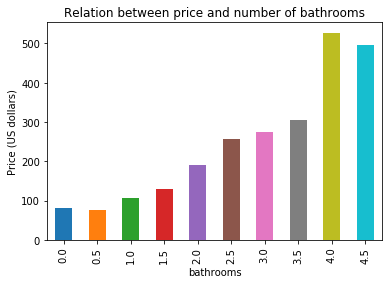

In [184]:
listings.groupby(['bathrooms']).mean()['price'].plot.bar()
plt.title('Relation between price and number of bathrooms')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

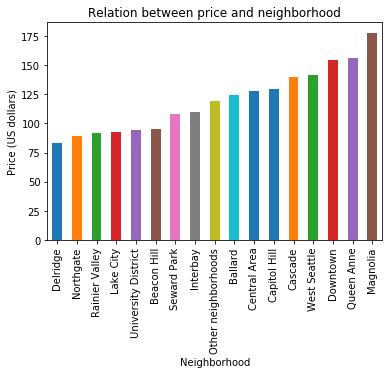

In [185]:
listings.groupby(['neighbourhood_group_cleansed']).mean()['price'].sort_values().plot.bar()
plt.title("Relation between price and neighborhood")
plt.xlabel('Neighborhood')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

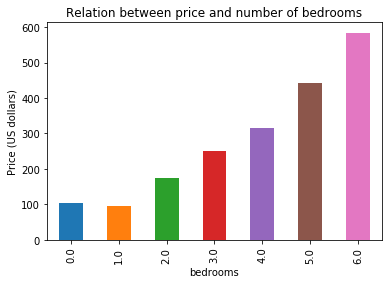

In [186]:
listings.groupby(['bedrooms']).mean()['price'].plot.bar()
plt.title('Relation between price and number of bedrooms')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

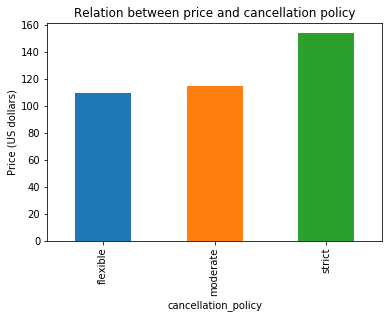

In [187]:
listings.groupby(['cancellation_policy']).mean()['price'].plot.bar()
plt.title('Relation between price and cancellation policy')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

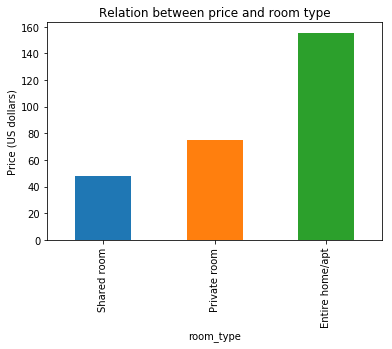

In [188]:
listings.groupby(['room_type']).mean()['price'].sort_values().plot.bar()
plt.title('Relation between price and room type')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

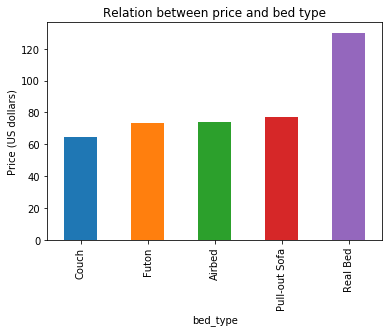

In [189]:
listings.groupby(['bed_type']).mean()['price'].sort_values().plot.bar()
plt.title('Relation between price and bed type')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

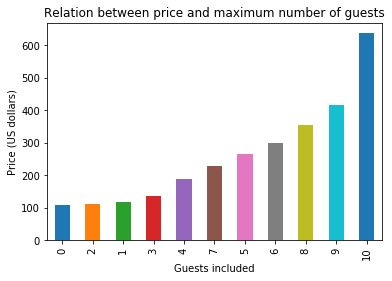

In [190]:
listings.groupby(['guests_included']).mean()['price'].sort_values().plot.bar()
plt.title('Relation between price and maximum number of guests')
plt.xlabel('Guests included')
plt.ylabel('Price (US dollars)')

Text(0,0.5,'Price (US dollars)')

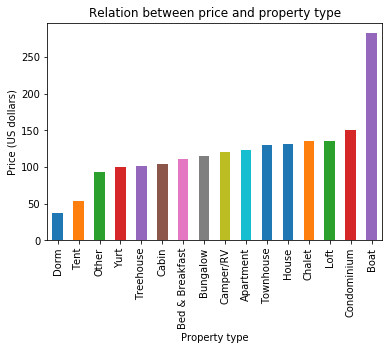

In [191]:
listings.groupby(['property_type']).mean()['price'].sort_values().plot.bar()
plt.title('Relation between price and property type')
plt.xlabel('Property type')
plt.ylabel('Price (US dollars)')